# **Libraries**


In [ ]:
!pip install python_speech_features
import python_speech_features as mfcc

In [ ]:
from scipy.io.wavfile import read
import numpy as np
from collections import Counter
import string
import os
import re
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Loading zipped dataset folder
!gdown https://drive.google.com/uc?id=1GbfEJ4JnTGthMs4RP5z17BrCQm6YxtEG

Downloading...
From: https://drive.google.com/uc?id=1GbfEJ4JnTGthMs4RP5z17BrCQm6YxtEG
To: /content/LUMS_FALL2020_PROJECT_DATA.zip
802MB [00:09, 85.2MB/s]


In [ ]:
# Unzipping dataset folder
!unzip LUMS_FALL2020_PROJECT_DATA.zip

# **Loading data for Gender Recognition**

In [ ]:
gender_data_list = os.listdir('Gender_Recognition/')

In [ ]:
gender_data_training_list = os.listdir('Gender_Recognition/Train/')
gender_data_testing_list = os.listdir('Gender_Recognition/Test/')
gender_data_validation_list = os.listdir('Gender_Recognition/Valid/')

In [ ]:
# Computing MFCC features from an audio signal
def get_MFCC(audio, sample_rate):
    features = mfcc.mfcc(audio, sample_rate, winlen = 0.025, winstep = 0.01, numcep = 13, appendEnergy = True)
    return np.mean(features, axis = 0)

In [ ]:
# reading the gender folders in a given directory and storing them in a list
def read_file_gender(directory, folder_list, X, Y): 

  # iterating through the list of folders in the given directory
  for folder in folder_list:
    # the gender is the last character of the folder name so extracting that
    gender = folder[-1]

    # making a list of files in the folder (of each person/individual)
    files_list = os.listdir(directory + folder + '/')
    for wave_file in files_list:
      # reading the wave file
      sample_rate, audio = read(directory + folder + '/' + wave_file)
      features = []
      features.append(get_MFCC(audio, sample_rate))
      X.append(features[0])
      Y.append(gender)

  # adding bias
  X = np.insert(X, 0, [1],axis=1)
  return X, Y

In [ ]:
# reading training data
trainingX = []
trainingY = []

trainingX, trainingY = read_file_gender('Gender_Recognition/Train/', gender_data_training_list, trainingX, trainingY)

In [ ]:
# reading testing data
testingX = []
testingY = []

testingX, testingY = read_file_gender('Gender_Recognition/Test/', gender_data_testing_list, testingX, testingY)

In [ ]:
# reading validation set data
validationX = []
validationY = []

validationX, validationY = read_file_gender('Gender_Recognition/Valid/', gender_data_validation_list, validationX, validationY)

# **Preprocessing gender data**

**Train data**

In [ ]:
# one hot encoding for gender
# female -> 1, male -> 0
# replacing F and M with binary values 0 and 1

one_hot_training = np.zeros((len(trainingY), 2))

for i in range(len(trainingY)):
  if trainingY[i] == 'M':
    one_hot_training[i][0] = 1
  elif trainingY[i] == 'F':
    one_hot_training[i][1]=1

trainingY = one_hot_training

**Validation data**

In [ ]:
# one hot encoding for gender # original
# female -> 1, male -> 0
# replacing F and M with binary values 0 and 1

for i in range(len(validationY)):
  if validationY[i] == 'M':
    validationY[i] = 0
  elif validationY[i] == 'F':
    validationY[i] = 1

**Test Data**

In [ ]:
# one hot encoding for gender
# female -> 1, male -> 0
# replacing F and M with binary values 0 and 1

for i in range(len(testingY)):
  if testingY[i] == 'M':
    testingY[i] = 0
  elif testingY[i] == 'F':
    testingY[i] = 1

# **Loading data for Speaker Recognition**

In [ ]:
speaker_data_list = os.listdir('Speaker_Recognition/')

In [ ]:
speaker_data_training_list = os.listdir('Speaker_Recognition/Train/')
speaker_data_testing_list = os.listdir('Speaker_Recognition/Test/')
speaker_data_validation_list = os.listdir('Speaker_Recognition/Valid/')

In [ ]:
# reading the speaker folders in a given directory and storing them in a list
def read_file_speaker(directory, folder_list, X, Y): 

  # iterating through the list of folders in the given directory
  for folder in folder_list:
    # the speakers are the last 5 characters of the folder name so extracting that
    speaker = folder[3:]

    # making a list of files in the folder (of each person/individual)
    files_list = os.listdir(directory + folder + '/')
    for wave_file in files_list:
      # reading the wave file
      sample_rate, audio = read(directory + folder + '/' + wave_file)
      features = []
      features.append(get_MFCC(audio, sample_rate))
      X.append(features[0])
      Y.append(speaker)

  # adding bias
  X = np.insert(X, 0, [1],axis=1)
  return X, Y

In [ ]:
# reading training data
speaker_trainingX = []
speaker_trainingY = []

speaker_trainingX, speaker_trainingY = read_file_speaker('Speaker_Recognition/Train/', speaker_data_training_list, speaker_trainingX, speaker_trainingY)

In [ ]:
# reading testing data
speaker_testingX = []
speaker_testingY = []

speaker_testingX, speaker_testingY = read_file_speaker('Speaker_Recognition/Test/', speaker_data_testing_list, speaker_testingX, speaker_testingY)

In [ ]:
# reading validation data
speaker_validationX = []
speaker_validationY = []

speaker_validationX, speaker_validationY = read_file_speaker('Speaker_Recognition/Valid/', speaker_data_validation_list, speaker_validationX, speaker_validationY)

# **Preprocessing Speaker Recognition data**

In [ ]:
# making hot vectors for speaker recognition
def hot_vector_speaker(speaker_list):
  temp1 = []
  speaker_label = Counter(speaker_list)
  temp1 = list(speaker_list)
  m = len(temp1) 
  
  hot_speaker_vector = [[0] * m for i in range(142)]

  for i in range(m):
    temp = temp1[i]
    temp1[i] = temp[-5:-2]

  for i in range(m):
    index = int(temp1[i])
    idx = index - 1
    hot_speaker_vector[idx][i] = 1

  hot_speaker_vector = np.array(hot_speaker_vector)

  return hot_speaker_vector.T

In [ ]:
hot_vector_speakers = hot_vector_speaker(speaker_trainingY)

# **Functions for Implementation**

In [ ]:
# calculating the softmax vector (h_x)
def softmax(X, Theta): 
  z = (np.array(Theta).T @ X)
  sum = np.sum(np.exp(z), axis = 0)
  sum = sum.reshape(len(sum), 1)
  expz = np.exp(z.T)
  softmax_vector = expz/sum

  return softmax_vector

In [ ]:
# using gradient descent to calculate the final weights
def gradient_descent(x, y, epochs, alpha):

  J = []
  w = np.zeros((14, np.shape(y)[1]))
  for epoch in range(epochs):
    h_x = softmax(x, w)
    z = (h_x - y).T @ x.T
    z = z.T
    w = w - (alpha * (1/len(y)) * z)
    J.append(cross_entropy_loss(h_x,y))

  return w, J

In [ ]:
# calculating cost
def cross_entropy_loss(y_pred, y):
  cost = - np.sum(y * np.log(y_pred))
  return cost

In [ ]:
# predicting the class based on the inputted h_x value
def predict(h_x):
  pred = np.argmax(h_x, axis = 0)
  pred2 = np.zeros((np.shape(h_x)[1], np.shape(h_x)[0]))
  idx = list()

  # one-hot encoding predicted results
  for i in range(0, (np.shape(h_x)[1])): 
    idx.append(pred[i])
    
  return idx

In [ ]:
# evaluating our results
def evaluation(y, y_pred, num_c): 
  if num_c == 2:
    accuracy_gender = accuracy_score(y,y_pred)
    print('Accuracy for Gender Recognition is = ', accuracy_gender*100)
    conf_mat1 = confusion_matrix(y, y_pred)
    print("Confusion matrix\n", conf_mat1)
    print(classification_report(y, y_pred))
  else:
    accuracy_speaker = accuracy_score(y,y_pred)
    print('Accuracy for Speaker Recognition is = ', accuracy_speaker*100)
    speaker_score = f1_score(y,y_pred, average = 'macro')
    print('F1 Score for Speaker Recongnition Validation is = ' , speaker_score*100)
    conf_mat1 = multilabel_confusion_matrix(y, y_pred)
    print("Confusion matrix\n", conf_mat1)
    print(classification_report(y, y_pred, zero_division=0))

# **Implementation of Gender Classification**

**Training**

In [ ]:
# training the classifier

alpha = [0.1, 0.2, 0.3, 0.4, 0.5]
epochs = 100
W = list()  #List of weights associated with each alpha
J = list()  #List of cross entropy losses associated with each alpha
J1 = list() #List of cross entropy loss of the last epoch
X = np.array(trainingX.T)
for i in range(5):
  a, b = gradient_descent(X, trainingY, epochs, alpha[i])
  W.append(a)
  J.append(b)
  J1.append(b[-1])

minimumcostindex = np.argmin(J1)  #Storing index of alpha with the least cross entropy loss
W = W[minimumcostindex]
J2 = J[minimumcostindex]

Text(0.5, 1.0, 'Loss Graph')

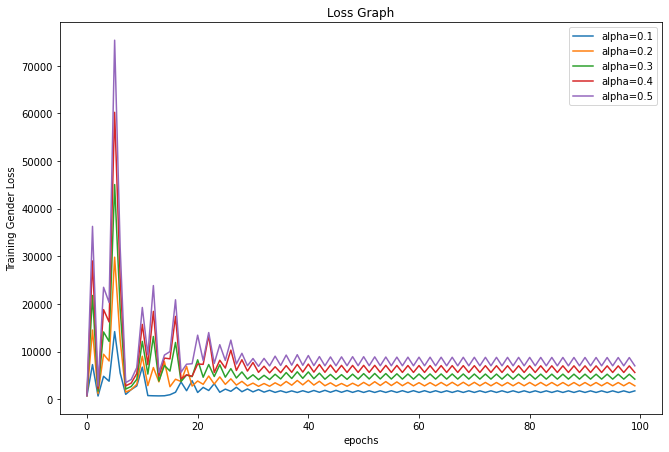

In [ ]:
plt.figure(figsize=(10.8,7.2))
plt.plot(J[0],label='alpha=0.1')
plt.plot(J[1],label='alpha=0.2')
plt.plot(J[2],label='alpha=0.3')
plt.plot(J[3],label='alpha=0.4')
plt.plot(J[4],label='alpha=0.5')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Training Gender Loss')
plt.title('Loss Graph')

**Validating**

In [ ]:
#Since alpha=0.1 gives the least cross entropy loss, the weights used will be the ones that are associated with the said value of alpha


# validating the classifier

validation_X = np.array(validationX).T
validh_x = softmax(validation_X, W)
y_predicted = predict(validh_x.T)
evaluation(validationY, y_predicted, 2)

Accuracy for Gender Recognition is =  85.88235294117646
Confusion matrix
 [[112  18]
 [  6  34]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       130
           1       0.65      0.85      0.74        40

    accuracy                           0.86       170
   macro avg       0.80      0.86      0.82       170
weighted avg       0.88      0.86      0.86       170



**Testing**

In [ ]:
# testing the classifier

testing_X = np.array(testingX).T
testh_x = softmax(testing_X, W)
y_predicted = predict(testh_x.T)
evaluation(testingY, y_predicted, 2)

Accuracy for Gender Recognition is =  84.70588235294117
Confusion matrix
 [[107  23]
 [  3  37]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       130
           1       0.62      0.93      0.74        40

    accuracy                           0.85       170
   macro avg       0.79      0.87      0.82       170
weighted avg       0.89      0.85      0.86       170



# **Implementation of Speaker Recognition**

In [ ]:
# extracting speaker labels
def speaker_labels(speaker_Y):
  speakerY = []
  for i in range(len(speaker_Y)):
    s = int(speaker_Y[i][-5:-2])
    speakerY.append(s)
  return speakerY

**Training**

In [ ]:
# training classifier - determining weight values
alpha = [0.1, 0.2, 0.3, 0.4, 0.5]
epochs = 100
W1 = list()
J1 = list()
J2 = list()
X = np.array(speaker_trainingX.T)
for i in range(5):
  a, b = gradient_descent(X, hot_vector_speakers, epochs, alpha[i])
  W1.append(a)
  J1.append(b)
  J2.append(b[-1])

minimumcostindex = np.argmin(J2)
W1 = W1[minimumcostindex]
J2 = J1[minimumcostindex]


**Plotting**

Text(0.5, 1.0, 'Loss Graph')

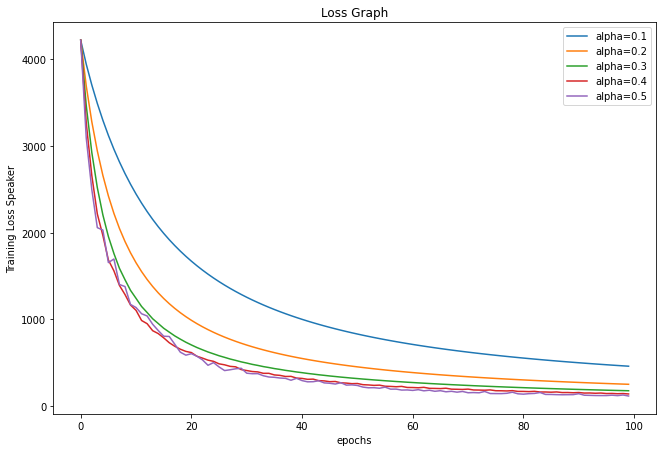

In [ ]:
# cost plot

plt.figure(figsize=(10.8,7.2))
plt.plot(J1[0],label='alpha=0.1')
plt.plot(J1[1],label='alpha=0.2')
plt.plot(J1[2],label='alpha=0.3')
plt.plot(J1[3],label='alpha=0.4')
plt.plot(J1[4],label='alpha=0.5')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Training Loss Speaker')
plt.title('Loss Graph')

**Validating**

In [ ]:
#Since alpha=0.5 gives the least cross entropy loss, the weights used will be the ones that are associated with the said value of alpha

# validating classifier

speaker_validationX = np.array(speaker_validationX).T
valid_sp_h_x = softmax(speaker_validationX, W1)
y_predicted_sp = predict(valid_sp_h_x.T)
validation_label_speaker = speaker_labels(speaker_validationY)

validation_predicted_speaker = np.zeros(len(y_predicted_sp))

for i in range(len(y_predicted_sp)):
  validation_predicted_speaker[i] = int(y_predicted_sp[i]) + 1

In [ ]:
# calculating F1 score for validation data
evaluation(validation_label_speaker,validation_predicted_speaker, 142)

Accuracy for Speaker Recognition is =  92.25352112676056
F1 Score for Speaker Recongnition Validation is =  91.55264922870556
Confusion matrix
 [[[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  1   1]]

 [[281   1]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[281   1]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  2   0]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  1   1]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[281   1]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[281   1]
  [  0   2]]

 [[282   0]
  [  1   1]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  1   1]]

 [[281   1]
  [  0   2]]

 [[281   1]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  1   1]]

 [[281   1]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[280   2]
  [  0   2]]

 [[282   0]
  [  0   2]]

**Testing Speaker**

In [ ]:
# testing classifier
speaker_testingX = np.array(speaker_testingX).T
testing_sp_h_x = softmax(speaker_testingX, W1)
y_predicted_speaker = predict(testing_sp_h_x.T)

testing_label_speaker = speaker_labels(speaker_testingY)

# synchronizing our prediction with Gold Labels by adding 1
testing_predicted_speaker = np.zeros(len(y_predicted_sp))
for i in range(len(y_predicted_speaker)):
  testing_predicted_speaker[i] = int(y_predicted_speaker[i]) + 1

In [ ]:
# calculating F1 score for testing data
evaluation(testing_label_speaker, testing_predicted_speaker,142)

Accuracy for Speaker Recognition is =  94.01408450704226
F1 Score for Speaker Recongnition Validation is =  93.33668678739102
Confusion matrix
 [[[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[281   1]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  2   0]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[281   1]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[281   1]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[281   1]
  [  0   2]]

 [[282   0]
  [  1   1]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[281   1]
  [  1   1]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  0   2]]

 [[282   0]
  [  1   1]]

 [[282   0]
  [  0   2]]

 [[279   3]
  [  0   2]]

 [[282   0]
  [  0   2]]